In [17]:
import numpy as np

# Load the .npz file
data = np.load('dataset_features.npz')

# List all arrays within the .npz file
print(data.files)

# Access individual arrays by their names
X_tr = data['trainset_features']
y_tr = data['trainset_labels']

X_val = data['validset_features']
y_val = data['validset_labels']

class_labels = data['class_labels']

X.shape

['trainset_features', 'validset_features', 'testset_features', 'trainset_labels', 'validset_labels', 'testset_labels', 'class_labels']


(280, 1280)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create a k-NN pipeline
knn_pipe = Pipeline(
    [("scaler", StandardScaler()), 
     ("knn", KNeighborsClassifier(n_neighbors=6))]
)

# Fit estimator
knn_pipe.fit(X_tr, y_tr)

# Evaluate on validation set
accuracy = knn_pipe.score(X_val, y_val)
print("Accuracy: {:.3f}".format(accuracy))


Accuracy: 0.827


In [46]:
import pandas as pd

# [Code adapted from the previous course]
# Variable to store the results
gs_results = []

# Generate a set of k values
k_values = np.r_[np.arange(1, 50, step=1)]

# Grid search
for k in k_values:
    # Fit k-NN model
    knn_pipe.set_params(knn__n_neighbors=k)
    knn_pipe.fit(X_tr, y_tr)

    # Save model and its performance on training/validation sets
    gs_results.append(
        {
            "k": k,
            "train_accuracy": knn_pipe.score(X_tr, y_tr),
            "valid_accuracy": knn_pipe.score(X_val, y_val),
        }
    )

# Convert results to DataFrame
gs_results = pd.DataFrame(gs_results)
gs_results.sort_values(by="valid_accuracy", ascending=False).head()

,k,train_accuracy,valid_accuracy
0,1,1.000000,0.863309
6,7,0.882143,0.856115
14,15,0.850000,0.848921
8,9,0.860714,0.848921
7,8,0.850000,0.848921


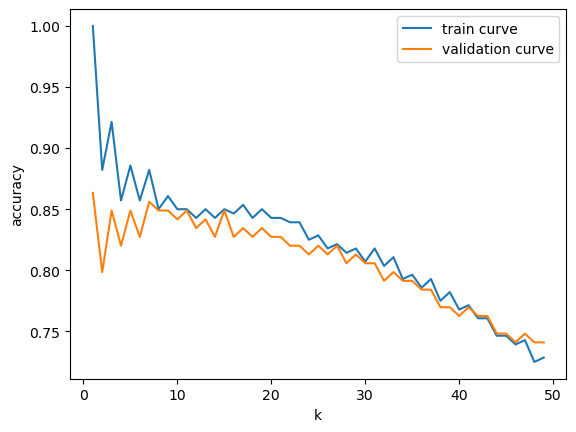

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot the validation curves
plt.plot(gs_results["k"], gs_results["train_accuracy"], label="train curve")
plt.plot(gs_results["k"], gs_results["valid_accuracy"], label="validation curve")
plt.ylabel("accuracy")
plt.xlabel("k")
plt.legend()
plt.show()

## Cross-validation

In [48]:
# Run several times the evaluation
gs_results = []
for run_idx in range(5):

    # Grid search
    for k in k_values:
        # Fit k-NN model
        knn_pipe.set_params(knn__n_neighbors=k)
        knn_pipe.fit(X_tr, y_tr)

        # Save model and its performance on training/validation sets
        gs_results.append(
            {
                "k": k,
                "run_idx": run_idx,
                "train_accuracy": knn_pipe.score(X_tr, y_tr),
                "valid_accuracy": knn_pipe.score(X_val, y_val),
            }
        )

# Convert results to DataFrame
gs_results = pd.DataFrame(gs_results)

In [55]:
gs_results.groupby('k')

Computing of statistics of different run results

In [50]:
# Group results by alpha value
grouped = gs_results.groupby("k")

# Compute training/validation mean scores with std
mean_tr = grouped.train_accuracy.mean()
mean_val = grouped.valid_accuracy.mean()
std_tr = grouped.train_accuracy.std()
std_val = grouped.valid_accuracy.std()

In [58]:
std_tr

k
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
32    0.0
33    0.0
34    0.0
35    0.0
36    0.0
37    0.0
38    0.0
39    0.0
40    0.0
41    0.0
42    0.0
43    0.0
44    0.0
45    0.0
46    0.0
47    0.0
48    0.0
49    0.0
Name: train_accuracy, dtype: float64

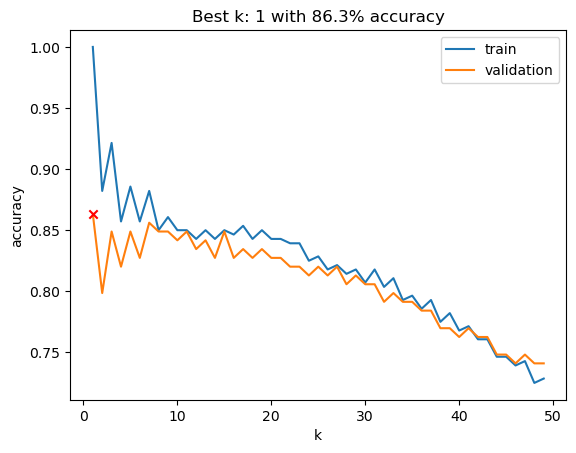

In [51]:
# Plot mean scores
plt.plot(k_values, mean_tr, label="train")
plt.plot(k_values, mean_val, label="validation")

# Add marker for best score
best_k = mean_val.idxmax()
plt.scatter(best_k, mean_val.max(), marker="x", c="red", zorder=10)

# Quantify variance with ±std curves
plt.fill_between(k_values, mean_tr - std_tr, mean_tr + std_tr, alpha=0.2)
plt.fill_between(k_values, mean_val - std_val, mean_val + std_val, alpha=0.2)
plt.title("Best k: {} with {:.1f}% accuracy".format(best_k, 100 * mean_val[best_k]))
plt.ylabel("accuracy")
plt.xlabel("k")
plt.legend()
plt.show()